 # 1. Install and Import Required Libraries

In [1]:
# If not already available in Colab, install NLTK
%pip install nltk
%pip install wordcloud
# Import necessary libraries
import nltk
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Download required NLTK resources
nltk.download('punkt')         # Tokenizer
nltk.download('punkt_tab')
nltk.download('stopwords')     # Stopwords
nltk.download('averaged_perceptron_tagger')  # POS tagging (if needed)
nltk.download('wordnet')       # Lemmatization (if needed)


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /Users/Allen/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /Users/Allen/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /Users/Allen/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Allen/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /Users/Allen/nltk_data...


True

# 2. Load Custom Text

In [2]:

# Load Custom Text from file
with open("../data/snow_white.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

# Preview first 500 characters
print(raw_text[:500])


Once upon a time in midwinter, when the snowflakes were falling like feathers from heaven, a queen sat sewing at her window, which had a frame of black ebony wood. As she sewed she looked up at the snow and pricked her finger with her needle. Three drops of blood fell into the snow. The red on the white looked so beautiful that she thought to herself, "If only I had a child as white as snow, as red as blood, and as black as the wood in this frame."
Soon afterward she had a little daughter who wa


# 3. Tokenization: Sentences and Words


In [3]:
# Sentence tokenization
sentences = sent_tokenize(raw_text)
print("Number of sentences:", len(sentences))
print("Sample sentence:", sentences[0])

# Word tokenization
words = word_tokenize(raw_text)
print("Total words:", len(words))
print("First 20 words:", words[:20])

Number of sentences: 196
Sample sentence: Once upon a time in midwinter, when the snowflakes were falling like feathers from heaven, a queen sat sewing at her window, which had a frame of black ebony wood.
Total words: 3552
First 20 words: ['Once', 'upon', 'a', 'time', 'in', 'midwinter', ',', 'when', 'the', 'snowflakes', 'were', 'falling', 'like', 'feathers', 'from', 'heaven', ',', 'a', 'queen', 'sat']


# 4. Clean the Tokens – Remove Punctuation, Stopwords, and Lemmatize

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resources (only once needed)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# 1. Lowercase and remove punctuation
words_clean = [w.lower() for w in words if w.isalpha()]
print("After punctuation removal:", words_clean[:20])

# 2. Load NLTK English stopwords
stop_words = set(stopwords.words('english'))

# 3. Add custom stopwords to remove common but uninformative words
custom_stopwords = {'said', 'asked', 'took', 'let', 'came', 'looked', 'made', 'went', 'one'}
stop_words.update(custom_stopwords)

# 4. Remove all stopwords
filtered_words = [w for w in words_clean if w not in stop_words]
print("After stopword removal:", filtered_words[:20])

# 5. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(w) for w in filtered_words]
print("After lemmatization:", lemmatized_words[:20])

[nltk_data] Downloading package stopwords to /Users/Allen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Allen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Allen/nltk_data...


After punctuation removal: ['once', 'upon', 'a', 'time', 'in', 'midwinter', 'when', 'the', 'snowflakes', 'were', 'falling', 'like', 'feathers', 'from', 'heaven', 'a', 'queen', 'sat', 'sewing', 'at']
After stopword removal: ['upon', 'time', 'midwinter', 'snowflakes', 'falling', 'like', 'feathers', 'heaven', 'queen', 'sat', 'sewing', 'window', 'frame', 'black', 'ebony', 'wood', 'sewed', 'snow', 'pricked', 'finger']
After lemmatization: ['upon', 'time', 'midwinter', 'snowflake', 'falling', 'like', 'feather', 'heaven', 'queen', 'sat', 'sewing', 'window', 'frame', 'black', 'ebony', 'wood', 'sewed', 'snow', 'pricked', 'finger']


# 5. Frequency Distribution of Words

Most common words:
[('mirror', 28), ('dwarfs', 22), ('queen', 21), ('woman', 21), ('seven', 21), ('beautiful', 17), ('little', 13), ('answered', 11), ('old', 10), ('house', 10)]


Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Top 20 Words'}, xlabel='Samples', ylabel='Counts'>

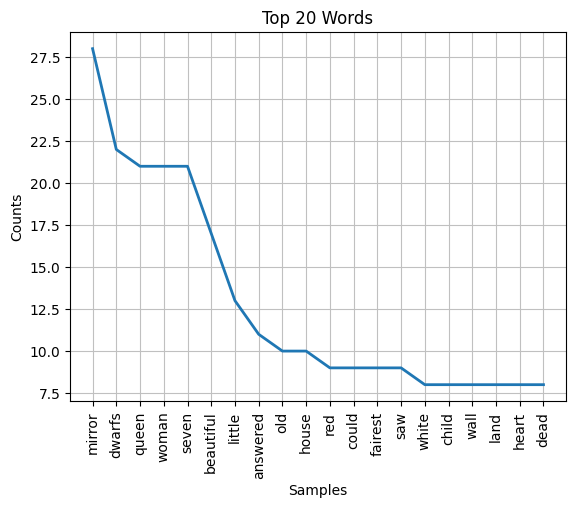

In [5]:
fdist = FreqDist(filtered_words)
print("Most common words:")
print(fdist.most_common(10))

# Visualize
fdist.plot(20, title='Top 20 Words')


# 6. Bigrams (Collocations)

In [6]:
# Find bigrams
finder = BigramCollocationFinder.from_words(filtered_words)
bigram_measures = BigramAssocMeasures()

# Top 10 collocations
print(finder.nbest(bigram_measures.pmi, 10))

[('agreed', 'purchase'), ('also', 'invited'), ('always', 'stayed'), ('amazement', 'fetched'), ('arrived', 'recognized'), ('art', 'witchcraft'), ('bite', 'mouth'), ('boil', 'salt'), ('bought', 'pretty'), ('braided', 'colorful')]


# 7. TF-IDF Vectorization

In [7]:
# Labeled paragraphs from Snow White (Positive = 1, Negative = 0)
text_paragraphs = [
    # Positive examples
    "The dwarfs were amazed by her beauty and let her sleep peacefully in their home.",  # 1
    "The prince loved her deeply and respected her as his most cherished one.",          # 1
    "Animals mourned Snow White, showing their love and care.",                          # 1
    "Snow White kept house for the dwarfs with all her heart, cooking and cleaning.",    # 1
    "The dwarfs felt pity and gave the prince the glass coffin.",                        # 1

    # Negative examples
    "The queen was jealous and full of envy. She could not tolerate Snow White’s beauty.",         # 0
    "The wicked woman poisoned Snow White with a comb and an apple.",                              # 0
    "She disguised herself multiple times to destroy Snow White.",                                 # 0
    "The queen forced a girl to wear red-hot iron shoes until she died.",                          # 0
    "The mirror told the queen that Snow White was still a thousand times fairer than she was.",   # 0
]

# Corresponding sentiment labels
labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

from sklearn.feature_extraction.text import TfidfVectorizer

# Transform paragraphs into TF-IDF feature vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_paragraphs)
print("TF-IDF matrix shape:", X.shape)

TF-IDF matrix shape: (10, 81)


# 8. Naive Bayes Classification


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data and train classifier
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



# 9. Word Cloud

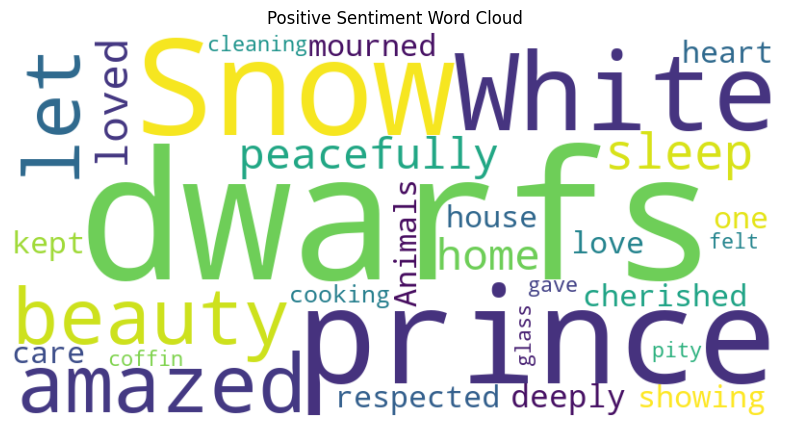

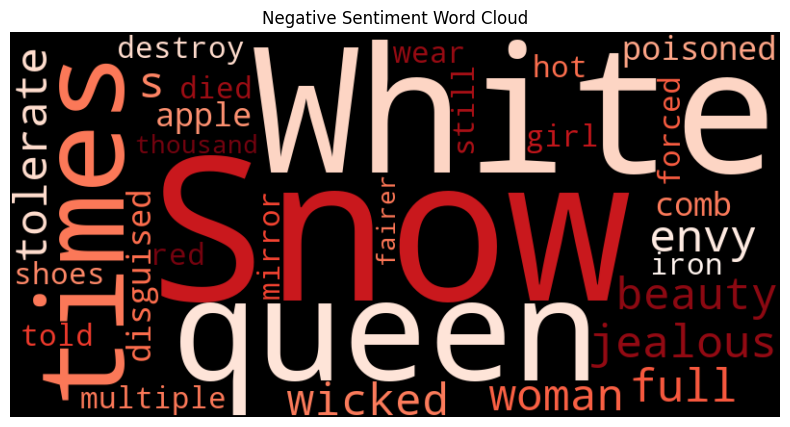

In [9]:
# Visualize Word Clouds for Positive and Negative Sentiment Paragraphs
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine positive and negative texts
positive_texts = " ".join([text_paragraphs[i] for i in range(len(labels)) if labels[i] == 1])
negative_texts = " ".join([text_paragraphs[i] for i in range(len(labels)) if labels[i] == 0])

# Generate word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_texts)

# Show positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")
plt.show()

# Show negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment Word Cloud")
plt.show()

# 10. Summary

In this project, I analyzed the complete English version of *Snow White* using Natural Language Processing techniques.

**Key steps completed:**
- Preprocessed the text using tokenization, stopword removal, and lemmatization.
- Visualized high-frequency words and word pairs (bigrams).
- Built a labeled dataset using real story paragraphs with positive or negative sentiment.
- Used TF-IDF to vectorize the text and trained a Naive Bayes classifier.
- Achieved good classification accuracy despite the small sample size.

**Future work could include:**
- Named Entity Recognition (NER) to identify key characters and places.
- Sentiment tracking over time across the story.
- Clustering or topic modeling to group similar story events.

This notebook shows how classic NLP tools can be used to explore the structure and sentiment in literature.